<h2 style="color:Blue">GRIP : The Spark Foundation</h2>

<h3>Data Science And Business Analysis</h3>

<h3>Name : Bhautik Badal</h3>

<h3>College : L D College Of engineering</h3>

<h3>Task 1: Prediction using Supervised ML</h3>

<h4>Description : This is a simple linear regression task as it involves just 2 variables.Predict the percentage of an student based on                                    the no. of study hours.</h4>

<h2 style="color:red">Step 1 : Import The Dataset</h2>

In [137]:
#importing require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Read Data From Dataset

In [139]:
url = "http://bit.ly/w-data"
Student_data = pd.read_csv(url)

### Explore The Data

In [23]:
# Check the shape of the dataset
print(Student_data.shape)
Student_data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
Student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
Student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [26]:
Student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
# Check missing value 
Student_data.isnull().sum() 

Hours     0
Scores    0
dtype: int64

##### There is no mising value in the dataset

<h2 style="color:red">Step 2: Visualizing The Dataset</h2>

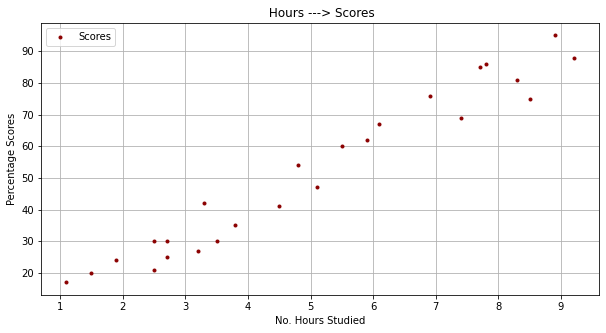

In [39]:
Student_data.plot(x='Hours',y='Scores',style=".",color="darkred",figsize=(10,5))
plt.title(' Hours ---> Scores')
plt.xlabel('No. Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

In [40]:
# Check the correlation between Hours and Scores
Student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### This shows the positive correlation between Hours and Scores

<h2 style="color:red">Step 3: Data Preparation</h2>

In [55]:
#divide the data by iloc function
X = Student_data.iloc[:,:1].values
Y =  Student_data.iloc[:,1:].values

In [56]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [57]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [58]:
#split the data into training and split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

<h2 style="color:red">Step 4: Apply : Simple Linear Algorithm</h2>

In [116]:
#create linear regression instance
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

In [117]:
#find the equation of the fit line

# find the slop
Slop = reg_model.coef_

# find the intercept
Intercept = reg_model.intercept_

print("Slop of the fit line is : ",float(Slop))

print("Intercept of the fit line is : ",float(Intercept))

Slop of the fit line is :  9.910656480642237
Intercept of the fit line is :  2.018160041434683


In [118]:
# Equation is
print(" Y = {:.4f} * X + {:.4f} ".format(float(Slop),float(Intercept)))

 Y = 9.9107 * X + 2.0182 


<h2 style="color:red">Step 5: Visualizing The Model</h2>

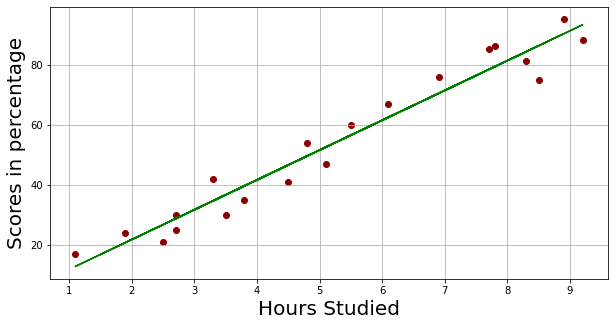

In [119]:
#ploting for the traing data

line = Slop * X + Intercept
plt.rcParams["figure.figsize"]=[10,5]
plt.scatter(X_train,Y_train,color="darkred")
plt.plot(X,line,color="green")
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Scores in percentage',fontsize=20)
plt.grid()
plt.show()

<h2 style="color:red">Step 6: Making Prediction</h2>

In [120]:
#Testing Data
print(X_test)
#Predicted Scores
Y_pred = reg_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [121]:
#Compair Actual and Predicted
print(f"Acutal :\n {Y_test}",end="\n")
print(f"Predict :\n {Y_pred}")

Acutal :
 [[20]
 [27]
 [69]
 [30]
 [62]]
Predict :
 [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


<h3>Predict The Score for 9.25 Hours/Day</h3>

In [128]:
X = 9.25
predicted_score = reg_model.predict([[X]])

In [129]:
print(float(predicted_score))

93.69173248737538


<h2>Predicted Score For 9.25 Hours/Day is : <b>93.6917324%</b></h2> 

<h2 style="color:red">Step 7: Evaluating The Data</h2>

In [148]:
#find mean absolute and squared error
from sklearn import metrics
print(f"Mean Absolute Error is : {metrics.mean_absolute_error(Y_test,Y_pred)}")
print(f"Mean Squared Error is : {metrics.mean_squared_error(Y_test,Y_pred)}")

Mean Absolute Error is : 4.183859899002975
Mean Squared Error is : 21.5987693072174
